In [1]:
import numpy as np
inf=float("inf")

import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('ggplot')

import scipy.stats as st

import stablerank.srank as sr
import stablerank.geometry_objects_2020 as ge

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import _pickle as pickle

from ripser import ripser
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from PIL import Image

#from keras.datasets import mnist
#from matplotlib import pyplot

### Import Data

In [2]:
# loading the data

df=pd.read_csv('challenges-in-representation-learning-facial-expression-recognition-challenge/icml_face_data.csv', sep=',')
#df=pd.read_csv('challenges-in-representation-learning-facial-expression-recognition-challenge/train.csv', sep=',',header=None)

In [7]:
# Removing duplicate values and reindexing

df.drop_duplicates(subset =[" pixels"], inplace = True)
df=df.reindex(range(0,len(df)-1))

In [8]:
# Inspecting the Dataframe

df

,emotion,Usage,pixels
0,0.0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0.0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2.0,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4.0,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6.0,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
...,...,...,...
34028,0.0,PrivateTest,157 157 157 157 156 156 155 155 157 155 155 14...
34029,3.0,PrivateTest,24 33 41 48 48 58 75 95 110 139 158 172 178 18...
34030,5.0,PrivateTest,42 70 65 49 34 33 34 39 58 61 86 86 68 93 76 5...
34031,0.0,PrivateTest,49 47 51 60 60 61 66 70 74 74 70 63 65 75 69 6...


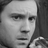

In [389]:
# Printing the first picture
first_picture = [int(numeric_string) for numeric_string in df[" pixels"][0].split(' ')]
first_picture_arr = np.array(first_picture)
first_picture_arr.resize((48,48))
im = Image.fromarray((255-first_picture_arr* 255).astype(np.uint8))
im